# Midterm (MACS 30150), February 11, 2019 [20 points total]
### Solutions
### Nipun Thakurele
You will have an hour and fifty minutes to take this exam.
1. Put your name in the space provided above (without the brackets).
2. Download this notebook and accompanying data `MidtermScores.csv`.
3. The class will disconnect their wi-fi and begin taking the exam.
4. The exam is open computer, closed internet, open note.
5. Once you are done, you will signal to a TA or instructor to come over and monitor while you reconnect to the internet and upload your edited notebook to Canvas.

Remember that you must clearly indicate your answers to all questions below. We will give partial credit for partially correct answers. The midterm is worth 20 points (2 problem sets).

# 1. Symbolic and Numerical Derivatives [10 points total]
This exercise will use the following function. In a household savings problem, the marginal utility of consumption is an important function. If a household has a constant relative risk aversion utility function, the marginal utility functional form can be the following:
\begin{equation}
  MU(c_t) \equiv \bigl(c_t\bigr)^{-\sigma}
\end{equation}
where $c_t>0$ is current period consumption and $\sigma\geq 1$ is the coefficient of constant relative risk aversion.

Assume the budget constraint every period is $c_t + b_{t+1} = (1+r_t)b_t + w_t$, where $b_t$ is the initial wealth in period $t$, $b_{t+1}$ is the savings chosen in period $t$ that comes back to the household in period $t+1$ with interest, and $w_t$ is the wage paid on the unit of inelastically supplied labor. Then we can rewrite the marginal utility of consumption above with the budget constraint substituted in.
\begin{equation}
  MU = \Bigl([1 + r_t]b_t + w_t - b_{t+1}\Bigr)^{-\sigma}
\end{equation}


## 1a) Plot the MU(c) function for different consumption values [2 points]
Assume that the coefficient of relative risk aversion is $\sigma = 1.8$. Use Python to plot the marginal utility of consumption for 100 equally spaced consumption values between 0.7 and 5.0. Make sure your plot has an $x$-axis labeled "consumption" and a $y$-axis labeled "marginal utility".

<IPython.core.display.Javascript object>


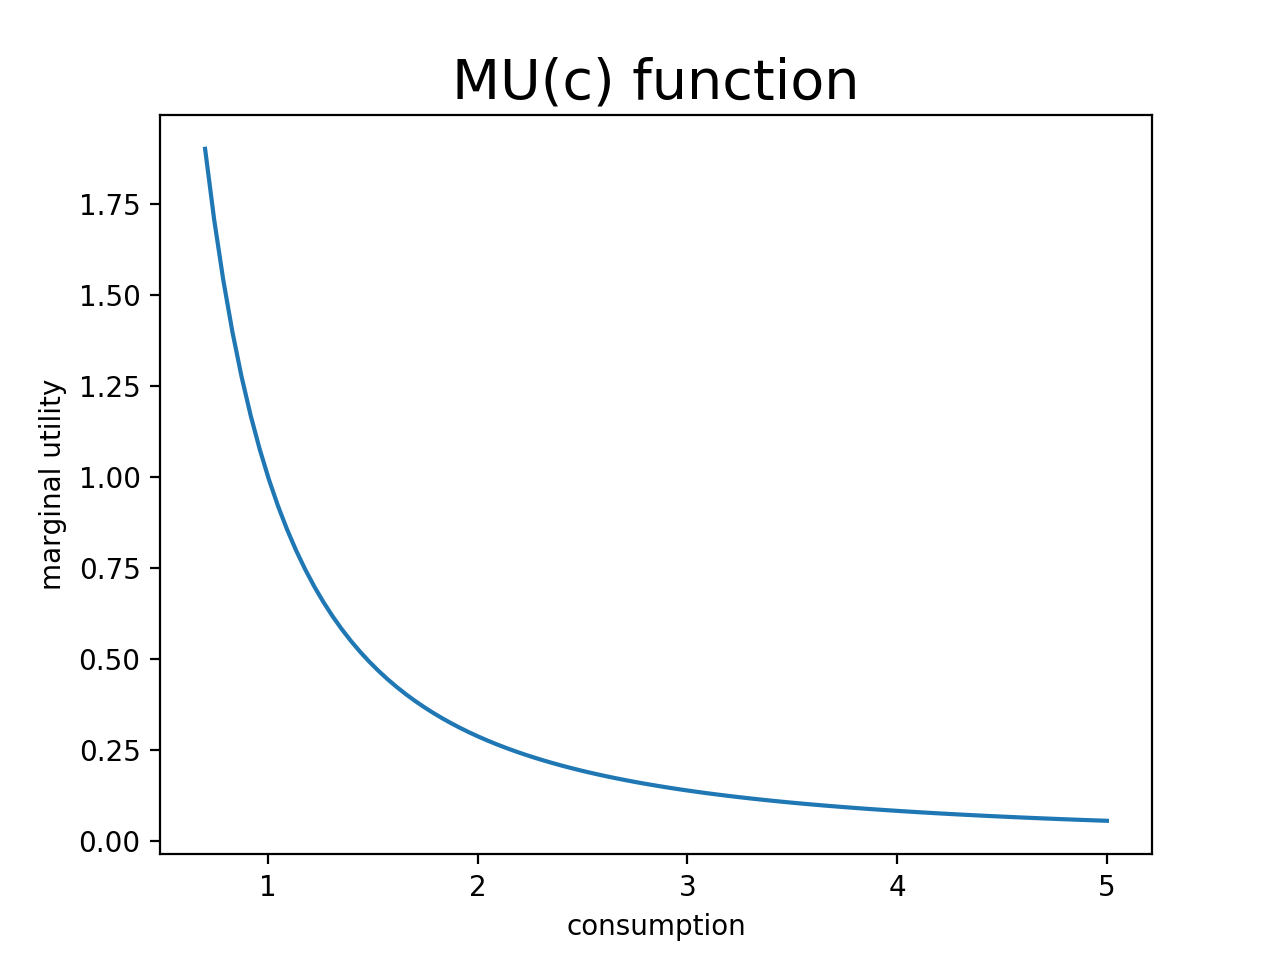

Text(0, 0.5, 'marginal utility')

In [30]:
import numpy as np
c = np.linspace(0.7, 5.0, 100)
sigma = 1.8
mu_c = c**(-sigma)
#print(mu_c)
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(c, mu_c)
plt.title('MU(c) function', fontsize=20)
plt.xlabel(r'consumption')
plt.ylabel(r'marginal utility')

## 1b) Symbolic numerical derivative [2 points]
Assume the version of the marginal utility above that has the budget constraint substituted in.
\begin{equation}
  MU = \Bigl([1 + r_t]b_t + w_t - b_{t+1}\Bigr)^{-\sigma}
\end{equation}
Use Python's symbolic math package `sympy` to compute the analytical derivative of the marginal utility function with respect to beginning-of-period wealth $b_t$. This will involve you declaring each variable and parameter as a symbol, then specifying the $MU$ funtion to be differentiated. The solution should be a function of all the variables and parameters $(b_t, b_{t+1}, r_t, w_t, \sigma)$. Leave the output in the form that `sympy` produces.

In [45]:
import sympy as sy
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time
#from autograd import grad
#from autograd import numpy as agnp

#Writing the given sybolic function and taking derivate
r_t = sy.symbols('r_t')
b_t = sy.symbols('b_t')
b_t_1 = sy.symbols('b_t_1')
w_t = sy.symbols('w_t')
sigma = sy.symbols('sigma')
f = ((1 + r_t)*b_t + w_t - b_t_1)**(-1 * sigma)
f_dash = sy.diff(f, b_t)
f_dash

-sigma*(r_t + 1)*(b_t*(r_t + 1) - b_t_1 + w_t)**(-sigma)/(b_t*(r_t + 1) - b_t_1 + w_t)

## 1c) Write a function that produces the analytical derivative [3 points]
Write a function that takes five inputs which are the values for the variables and parameters of the marginal utility $(b_t, b_{t+1}, r_t, w_t, \sigma)$ and returns the analytical derivative of the marginal utility (scalar) with respect to beginning-of-period wealth $b_t$ associated with those values. Show your function definition in the cell below. Name your function `dMU_c`. Print out the value of the function for the following three combinations of variables and parameters.

$$ \frac{\partial MU_1}{\partial b_t}:\quad b_t=1.0, \:\: b_{t+1}=0.8, \:\: r_t=0.04, \:\: w_t=1.2, \:\: \sigma=2.2 $$

$$ \frac{\partial MU_2}{\partial b_t}:\quad b_t=5.0, \:\: b_{t+1}=2.1, \:\: r_t=0.01, \:\: w_t=1.8, \:\: \sigma=2.0 $$

$$ \frac{\partial MU_3}{\partial b_t}:\quad b_t=3.3, \:\: b_{t+1}=3.4, \:\: r_t=0.03, \:\: w_t=1.0, \:\: \sigma=1.8 $$

In [54]:
def dMU_c(r, b_t, b_t_1, w_t, sigma):
    
    g = sy.lambdify((r_t, b_t, b_t_1, w_t, sigma), f_dash)
    return g(r_t, b_t, b_t_1, w_t, sigma)


print("value 1 : ", dMU_c(0.04, 1.0, 0.8, 1.2, 2.2))
print("value 2 : ", dMU_c(0.01, 5.0, 2.1, 1.8, 2.0))
print("value 3 : ", dMU_c(0.03, 3.3, 3.4, 1.0, 1.8))

SyntaxError: invalid syntax (<lambdifygenerated-13>, line 1)

## 1d) Compute the numerical derivative approximation [3 points]
Use the centered second-order finite difference approximation of the derivative to calculate the numerical derivative of the marginal utility function.

$$ f'(x_0)\approx \frac{\bigl(f(x_0) + h\bigr) - \bigl(f(x_0) - h\bigr)}{2h} $$

Recall that our marginal utility function is a function of four variables and the parameter $\sigma$.
\begin{equation}
  MU = \Bigl([1 + r_t]b_t + w_t - b_{t+1}\Bigr)^{-\sigma}
\end{equation}
So we want to approximate the derivative of the marginal utility with respect to beginning-of-period wealth $\partial MU(c)/\partial b_t$ by using the centered second-order finite difference approximation above. A helpful hint on how to do this is the marginal utility function is like $f(x)$ and the derivative is the centered second-order approximation equation.

Define a function named `dMU_c_approx` that takes as inputs the five variables and parameters $(b_t, b_{t+1}, r_t, w_t, \sigma)$ as well as a finite difference amount $h$. Have this function return the centered second-order approximation of the derivative of the marginal utility function with respect to beginning-of-period wealth.

Using your `dMU_c` function from part (c), print the analytical derivative of the marginal utility function with respect to beginning-of-period wealth with the following parameterization.

$$ \frac{\partial MU}{\partial b_t}:\quad b_t=1.0, \:\: b_{t+1}=0.8, \:\: r_t=0.04, \:\: w_t=1.2, \:\: \sigma=2.2 $$

Use your `dMU_c_approx` function to print out the numerical approximation of the derivative for the specification above with the following three finite difference amounts: $h_1 = 0.1$, $h_2= 0.001$ and  $h_3=0.00001$.

In [63]:
h1 = 0.1
h2 = 0.001
h3 = 0.00001

def centered_2(f, x_vals, h = 0.001):
    return [(f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h) for x in x_vals]


# 2. Maximum likelihood estimation [10 points total]
This exercise will make use of the `MidtermScores.csv` dataset, which contains 97 observations of students' midterm scores $scores_i$ as well as the number of hours they studied for the midterm $hours_i$ and whether the midterm was within a week of Chinese New Year $ch\_ny_i$.

* `scores`: score of $i$th student on midterm
* `hours`: number of hours that $i$th student studied for the midterm
* `ch_ny`: =1 if the midterm was within a week of Chinese New Year, =0 otherwise

You can load these data into Python as a numpy array using the `np.loadtxt()` command.

In [7]:
import numpy as np

data = np.loadtxt('MidtermScores.csv', delimiter=',', skiprows=1)
print('Shape of the data=', data.shape)
scores = data[:, 0]
hours = data[:, 1]
ch_ny = data[:, 2]

Shape of the data= (97, 3)


Assume that our model of student midterm scores is the following linear model.

$$ scores_i = \beta_0 + \beta_1 hours_i + \beta_2 ch\_ny_i + \varepsilon_i \quad\text{where}\quad \varepsilon_i\sim N(0,\sigma) $$

where the error $\varepsilon_i$ are normally distributed with mean 0 and standard deviation $\sigma$.

## 2a) Log likelihood function [3 points]
Define a function named `log_lik` that takes as inputs three data vectors $scores_i$, $hours_i$, $ch\_ny_i$, three coefficient parameters $\beta_0$, $\beta_1$, $\beta_2$, and the standard deviation $\sigma$ of the normally distributed errors and returns the log likelihood (a scalar). Print the log likelihood value for the first 10 data observations given all the coefficients are equal to one $\beta_0, \beta_1, \beta_2=1.0$ and the standard deviation of the errors is equal to $\sigma=0.5$. For the answer to this question, I want to see a function and one scalar log-likelihood value.

In [4]:
MU = 0 #mean

# Define likelihood function
from scipy.stats import norm

def likelihood_func(y, x1, x2, b0, b1, b2, sigma):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the normal pdf with mean mu and standard
    --------------------------------------------------------------------
    INPUTS:
    y, x1, x2 : numpy arrays corresponding to scores, hours and ch_ny variables
    b0, b1, b2: coefficients of variables: constant, hours and ch_ny, respectively
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: likelihood function values
    --------------------------------------------------------------------
    '''
    return norm(MU, sigma).pdf((y - b0 - b1*x1 - b2*x2))

# Define log-likelihood function
def log_lik_func(y, x1, x2, b0, b1, b2, sigma):
    vals = likelihood_func(y, x1, x2, b0, b1, b2, sigma)
    ln_vals = np.log(vals)
    log_lik_func = ln_vals.sum()
    
    return log_lik_func

print(log_lik_func(scores[0:10], hours[0:10], ch_ny[0:10], b0=1, b1=1, b2=1, sigma=0.5))

-186.8990404522523


## 2b) Estimate the parameters by MLE [7 points]
Estimate the four parameters $\beta_0, \beta_1, \beta_2, \sigma$ to maximize the log likelihood from part (a). Remember that a minimizer will have to minimize the negative of the log likelihood. Use all 97 observations for this estimation. Use an initial guess of $\beta_0=10.0$, $\beta_1=1.0$, $\beta_2=1.0$, and $\sigma=$ the standard deviation of the $scores_i$ variable. Report your estimated coefficients $\beta_0, \beta_1, \beta_2$ and standard deviation $\sigma$. What is the predicted effect on a midterm score of a student who takes the test around Chineses New Year $ch\_ny_i=1$ versus the score of a student who does not take the test around Chinese New year $ch\_ny_i=0$, other things being equal?

In [5]:
def new_crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (4,) vector, ([b0, b1, b2, sigma])
    args   = y, x1, x2

    OBJECTS CREATED WITHIN FUNCTION:
    log_likelihood_val = scalar, value of the log likelihood function
    neg_log_likelihood_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    b0, b1, b2, sigma = params
    y, x1, x2 = args
    log_likelihood_val = log_lik_func(y, x1, x2, b0, b1, b2, abs(sigma))
    neg_log_likelihood_val = -log_likelihood_val
    
    return neg_log_likelihood_val

In [16]:
import scipy.optimize as opt

b0_init = 10.0
b1_init = 1.0
b2_init = 1.0
sigma_init = np.std(scores)

params_init = np.array([b0_init, b1_init, b2_init, sigma_init])
mle_args = (scores, hours, ch_ny)
results_opti = opt.minimize(new_crit, params_init, args=(mle_args))
b0_MLE, b1_MLE, b2_MLE, sigma_MLE = results_opti.x
print('b0_MLE=', b0_MLE, 'b1_MLE=', b1_MLE)
print('b2_MLE=', b2_MLE, ' sigma_MLE=', sigma_MLE)

b0_MLE= 4.750441572276396 b1_MLE= 0.7157362219553016
b2_MLE= -1.890927284965692  sigma_MLE= 0.6527539803245753


On average a student who takes midterm exam around Chinese New Year have a score of 1.89 points
lesser than the student who doesn't takes it around Chinese New Year, other things being equal.
It is because coefficient of x2 (ch_ny) in our model is -1.89

